In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt
import random

from vae import BetaVAE, FactorVAE, kl_divergence_stdnorm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Variational Auto-Encoder

## Load 2D shape dataset

In [4]:
data = np.load('./data/2d_sprites.npz', allow_pickle=True, encoding='latin1')
imgs = data['imgs'].astype('float32')

## Load pre-trained model

In [5]:
vae = BetaVAE(beta=1.0)

vae.decoder(vae.encoder([])[0])

vae.encoder.load_weights('./trained_models/vae/encoder.h5')
vae.decoder.load_weights('./trained_models/vae/decoder.h5')

## Reconstruction

In [6]:
samples = imgs[np.random.randint(imgs.shape[0], size=5)]
z_mle, _ = vae.encoder(samples)
reconstruction_mle = np.rint(sigmoid(vae.decoder(z_mle)))

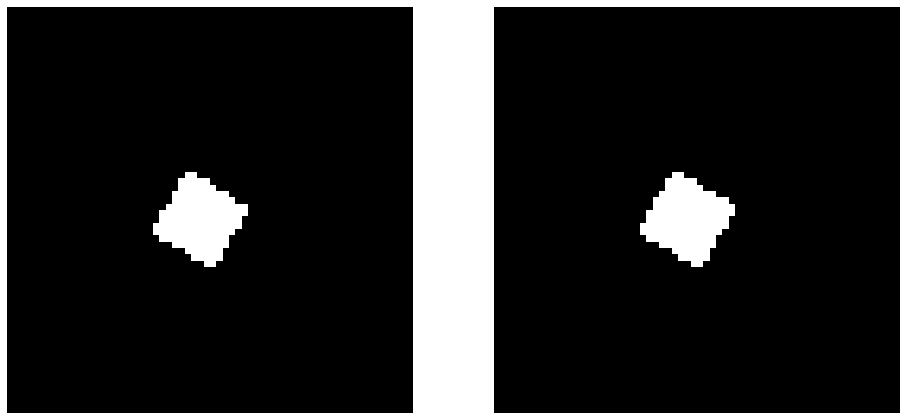

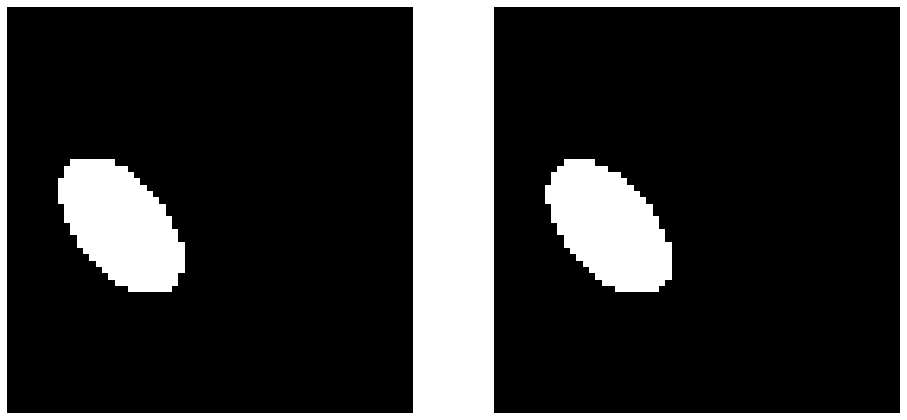

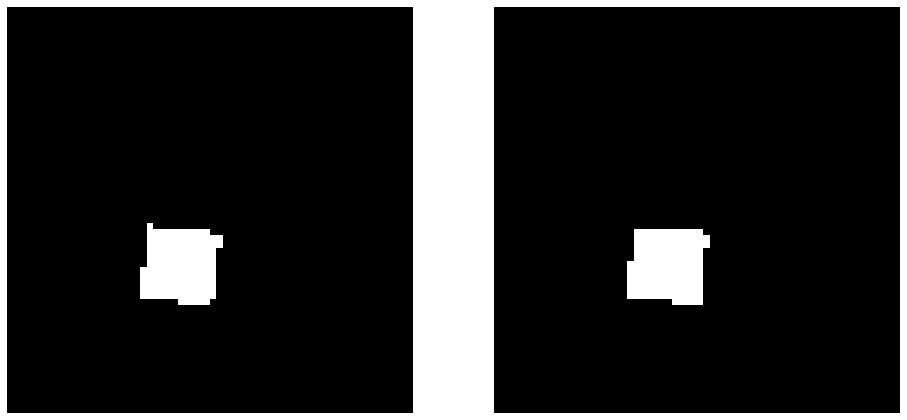

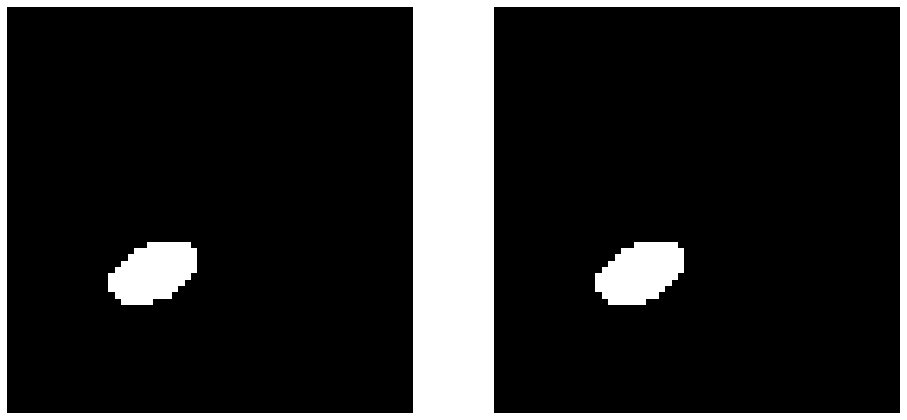

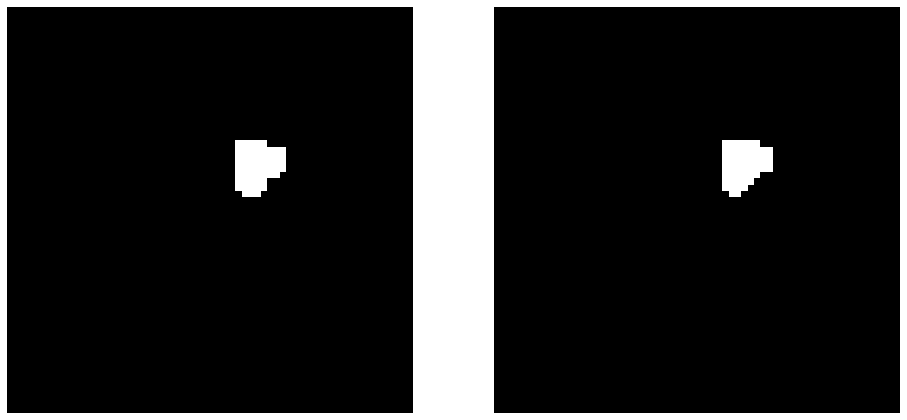

In [7]:
for x, x_rec in zip(samples, reconstruction_mle):
    
    plt.figure(figsize=(16,16))
    
    plt.subplot(1, 2, 1)
    plt.imshow(-(x - 1), cmap='Greys')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(-(x_rec-1), cmap='Greys')
    plt.axis('off')
    plt.show()

## Latent Traversal

In [9]:
# sort by kl
sampled_imgs = imgs[np.random.randint(0, imgs.shape[0], size=5000)]
z_means, z_stdevs = vae.encoder(sampled_imgs)

lower_bounds = np.min(z_means - 1*np.exp(z_stdevs), axis=0)
upper_bounds = np.max(z_means + 1*np.exp(z_stdevs), axis=0)

kl_divergences = [kl_divergence_stdnorm(z_means[:,i], z_stdevs[:,i:i+1]).numpy() for i in range(z_means.shape[1])]
kl_argsort = np.argsort(kl_divergences)

# show sliders
sliders = dict()

rand_img = imgs[random.randint(0, imgs.shape[0])]
rand_z, _ = vae.encoder(np.array([rand_img]))
for i in kl_argsort[::-1]:
    step_size = (upper_bounds[i] - lower_bounds[i])/15
    sliders[str(i)] = widgets.FloatSlider(min=lower_bounds[i], max=upper_bounds[i], step=step_size, value=rand_z[0,i])    
    
ui = widgets.VBox(list(sliders.values()))

def f(**kwargs):
    z = [kwargs[str(i)] for i in range(10)]
    z = np.array([z])
    rec = sigmoid(vae.decoder(z))
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(-(np.rint(rec[0]) - 1), cmap='Greys')

out = widgets.interactive_output(f, sliders)

display(ui, out)

Output()

In [15]:
import imageio

rand_img = imgs[random.randint(0, imgs.shape[0])]
rand_z, _ = vae.encoder(np.array([rand_img]))

for i in kl_argsort[::-1]:
    
    images = []
    for c in np.linspace(-2.0, 2.0, 20):
        z = rand_z.numpy()
        z[0,i] = c
        rec = sigmoid(vae.decoder(z))
        images.append(rec[0])
        
    images = images + images[::-1]
    imageio.mimsave('vae_' + str(i) + '.gif', images)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0